# Machine Learning Fundamentals Worksheet

Welcome to this hands-on exploration of machine learning fundamentals! In this notebook, you'll learn about:
1. The ML process overview
2. K-Nearest Neighbors algorithm
3. Measuring and understanding error

Let's start by importing the libraries we'll need:

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import math

# Set up matplotlib for better plots
plt.style.use('default')
plt.rcParams['figure.figsize'] = (10, 6)

print("Libraries imported successfully! Let's begin! 🚀")

Libraries imported successfully! Let's begin! 🚀


---

## Part 1: Overview of Machine Learning Process (15 minutes)

Machine learning follows a systematic process. Let's understand it step by step.

### Exercise 1.1: The ML Pipeline

Below is a scrambled list of steps in the machine learning process. **Write the correct order (1-7) in the comments:**

In [4]:
# Fill in the correct order (1-7) for each step:

steps = {
    "Deploy and monitor the model": 7,          # Order: ?
    "Collect and prepare data": 2,              # Order: ?
    "Define the problem and goals": 1,          # Order: ?
    "Evaluate model performance": 6,            # Order: ?
    "Choose and train a model": 5,              # Order: ?
    "Split data into train/validation/test": 4, # Order: ?
    "Feature engineering and selection": 3     # Order: ?
}

# TODO: Fill in the correct numbers above
# Hint: Think about what you need to do first, second, etc.

print("Once you fill in the orders, run this cell to see your answers!")

Once you fill in the orders, run this cell to see your answers!


### Exercise 1.2: Problem Classification

Let's practice identifying different types of ML problems:

In [7]:
# Match each problem to its ML task type
# Types: 'classification', 'regression', 'clustering', 'recommendation'

problems = {
    "Predicting house prices": 'regression',               # TODO: Fill this in
    "Detecting spam emails": 'classification',                 # TODO: Fill this in
    "Recommending movies to users": 'recommendation',          # TODO: Fill this in
    "Grouping customers by behavior": 'clustering',        # TODO: Fill this in
    "Predicting stock prices": 'regression',               # TODO: Fill this in
    "Diagnosing medical conditions": 'classification'          # TODO: Fill this in
}

# Check your work:
for problem, task_type in problems.items():
    print(f"{problem}: {task_type}")

Predicting house prices: regression
Detecting spam emails: classification
Recommending movies to users: recommendation
Grouping customers by behavior: clustering
Predicting stock prices: regression
Diagnosing medical conditions: classification


### Exercise 1.3: Quick Warm-up - Data Visualization

Let's start with a simple exercise to get comfortable with plotting:

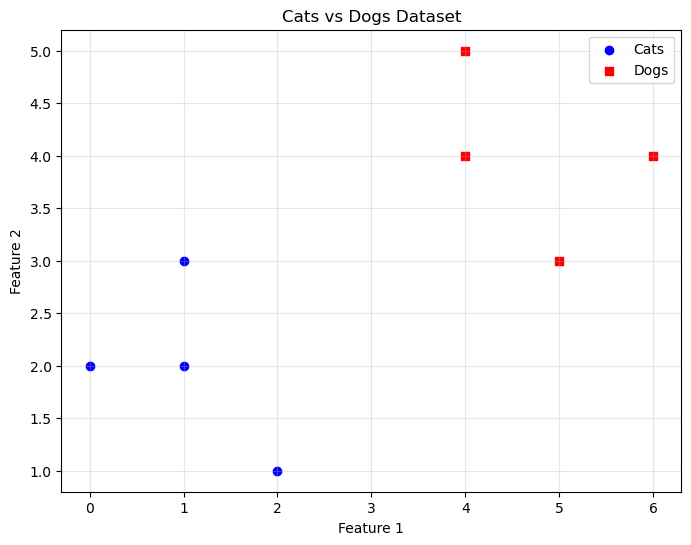

We have 4 cats and 4 dogs in our dataset!


In [8]:
# Create some simple 2D data
cats = [(1, 2), (2, 1), (1, 3), (0, 2)]
dogs = [(4, 4), (5, 3), (4, 5), (6, 4)]

# TODO: Plot the cats and dogs data
# Hint: Use plt.scatter() with different colors for cats and dogs

# Extract x and y coordinates for cats
cat_x = [point[0] for point in cats]  # TODO: Complete this line
cat_y = [point[1] for point in cats] # TODO: Complete this line

# Extract x and y coordinates for dogs  
dog_x = [point[0] for point in dogs] # TODO: Complete this line
dog_y = [point[1] for point in dogs] # TODO: Complete this line

# Create the plot
plt.figure(figsize=(8, 6))
plt.scatter(cat_x, cat_y, color='blue', marker='o', label='Cats')# TODO: Add scatter plots for cats (use 'blue' and 'o' marker)
plt.scatter(dog_x, dog_y, color='red', marker='s', label='Dogs')# TODO: Add scatter plots for dogs (use 'red' and 's' marker)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Cats vs Dogs Dataset')
plt.legend(['Cats', 'Dogs'])
plt.grid(True, alpha=0.3)
plt.show()

print(f"We have {len(cats)} cats and {len(dogs)} dogs in our dataset!")

---

## Part 2: K-Nearest Neighbors Algorithm

Now let's dive into K-NN! We'll start with understanding it conceptually, then implement it step by step.

### Exercise 2.1: Understanding Distance

The foundation of K-NN is measuring distance between points. Let's start with a simple exercise:

Point A: (1, 2)
Point B: (4, 6)
Distance: 5.00


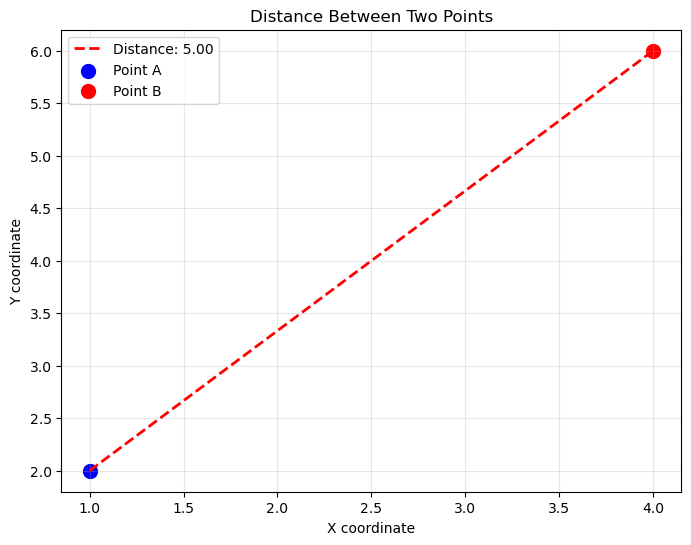

In [12]:
# Let's calculate distance manually first
point_a = (1, 2)
point_b = (4, 6)

# TODO: Calculate Euclidean distance between point_a and point_b
# Formula: sqrt((x1-x2)² + (y1-y2)²)

x_diff = point_a[0] - point_b[0]# TODO: Calculate x difference
y_diff = point_a[1] - point_b[1]# TODO: Calculate y difference
distance = math.sqrt(x_diff**2 + y_diff**2)# TODO: Calculate the final distance using math.sqrt()

print(f"Point A: {point_a}")
print(f"Point B: {point_b}")
print(f"Distance: {distance:.2f}")

# Let's visualize this
plt.figure(figsize=(8, 6))
plt.plot([point_a[0], point_b[0]], [point_a[1], point_b[1]], 'r--', linewidth=2, label=f'Distance: {distance:.2f}')
plt.scatter([point_a[0]], [point_a[1]], color='blue', s=100, label='Point A')
plt.scatter([point_b[0]], [point_b[1]], color='red', s=100, label='Point B')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.title('Distance Between Two Points')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### Exercise 2.2: Implement Distance Function

Now let's code our distance function:

In [14]:
def euclidean_distance(point1, point2):
    """
    Calculate Euclidean distance between two points.
    
    Args:
        point1: tuple of (x, y)
        point2: tuple of (x, y)
    
    Returns:
        float: Euclidean distance
    """
    x_diff = point1[0] - point2[0]# TODO: Calculate x difference
    y_diff = point1[1] - point2[1]# TODO: Calculate y difference
    return math.sqrt(x_diff**2 + y_diff**2)
    # TODO: Implement the distance formula
    # Hint: Use math.sqrt() and remember the formula from above
    
    # TODO: Return the calculated distance

# Test your function
test_cases = [
    ((0, 0), (3, 4)),  # Should be 5.0
    ((1, 1), (1, 1)),  # Should be 0.0
    ((0, 0), (1, 1))   # Should be ~1.41
]

print("Testing your distance function:")
for i, (p1, p2) in enumerate(test_cases):
    result = euclidean_distance(p1, p2)
    print(f"Test {i+1}: Distance from {p1} to {p2} = {result:.2f}")

Testing your distance function:
Test 1: Distance from (0, 0) to (3, 4) = 5.00
Test 2: Distance from (1, 1) to (1, 1) = 0.00
Test 3: Distance from (0, 0) to (1, 1) = 1.41


### Exercise 2.3: Manual K-NN Classification

Before we code the full algorithm, let's do a manual classification to understand the concept:

In [15]:
# Our training data: (x, y, label)
training_data = [
    (1, 1, 'cat'), (2, 1, 'cat'), (1, 2, 'cat'),
    (5, 5, 'dog'), (6, 5, 'dog'), (5, 6, 'dog')
]

# Point we want to classify
test_point = (3, 3)

print("Manual K-NN Classification")
print(f"Test point: {test_point}")
print("\nCalculating distances to all training points:")

distances = []
for x, y, label in training_data:
    dist = euclidean_distance(test_point, (x, y))
    distances.append((x, y, label, dist))
    print(f"Distance to ({x}, {y}, '{label}'): {dist:.2f}")

# TODO: Sort distances and find the 3 nearest neighbors
distances.sort(key=lambda x: x[3])  # Sort by distance (4th element)
k = 3
nearest_neighbors = distances[:k]

print(f"\n{k} Nearest Neighbors:")
for x, y, label, dist in nearest_neighbors:
    print(f"  ({x}, {y}, '{label}') - Distance: {dist:.2f}")

# TODO: Count votes and make prediction
votes = {}
for _, _, label, _ in nearest_neighbors:
    votes[label] = votes.get(label, 0) + 1 # TODO: Count the votes for each label
    #pass

# TODO: Find the label with most votes
predicted_class = max(votes, key=votes.get)# TODO: Complete this

print(f"\nVotes: {votes}")
print(f"Predicted class: {predicted_class}")

Manual K-NN Classification
Test point: (3, 3)

Calculating distances to all training points:
Distance to (1, 1, 'cat'): 2.83
Distance to (2, 1, 'cat'): 2.24
Distance to (1, 2, 'cat'): 2.24
Distance to (5, 5, 'dog'): 2.83
Distance to (6, 5, 'dog'): 3.61
Distance to (5, 6, 'dog'): 3.61

3 Nearest Neighbors:
  (2, 1, 'cat') - Distance: 2.24
  (1, 2, 'cat') - Distance: 2.24
  (1, 1, 'cat') - Distance: 2.83

Votes: {'cat': 3}
Predicted class: cat


### Exercise 2.4: Visualizing K-NN

Let's visualize what's happening:

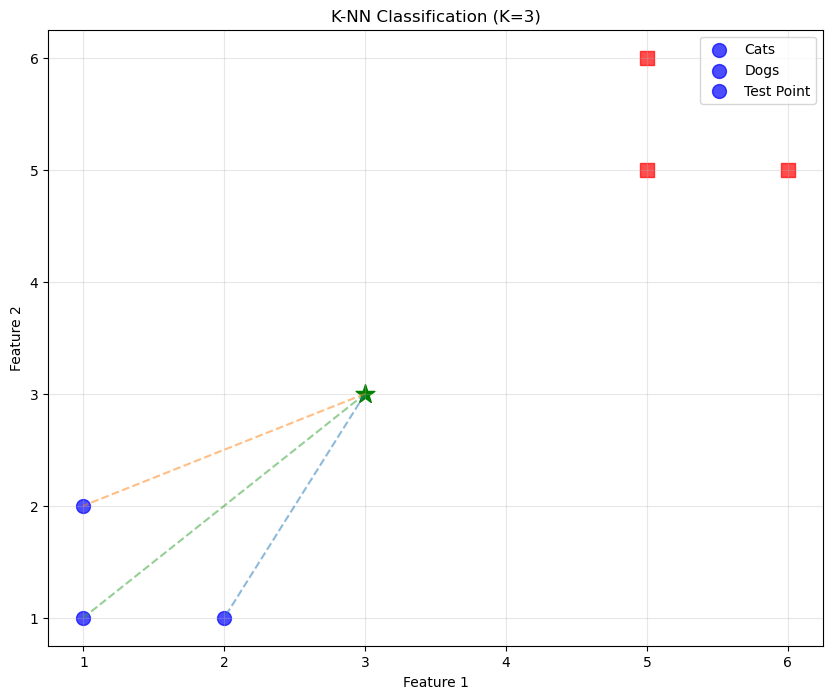

The test point (3, 3) is classified as: cat


In [16]:
# Visualize the K-NN process
plt.figure(figsize=(10, 8))

# Plot training data
for x, y, label in training_data:
    color = 'blue' if label == 'cat' else 'red'
    marker = 'o' if label == 'cat' else 's'
    plt.scatter(x, y, color=color, marker=marker, s=100, alpha=0.7)

# Plot test point
plt.scatter(test_point[0], test_point[1], color='green', marker='*', s=200, label='Test Point')

# TODO: Draw lines to the k nearest neighbors
for x, y, label, dist in nearest_neighbors:
    # TODO: Draw a line from test_point to this neighbor
    # Hint: Use plt.plot([x1, x2], [y1, y2], '--', alpha=0.5)
    plt.plot([test_point[0], x], [test_point[1], y], '--', alpha=0.5)
    #pass

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title(f'K-NN Classification (K={k})')
plt.legend(['Cats', 'Dogs', 'Test Point'])
plt.grid(True, alpha=0.3)
plt.show()

print(f"The test point {test_point} is classified as: {predicted_class}")

### Exercise 2.5: Complete K-NN Implementation

Now let's implement the complete K-NN algorithm:

In [17]:
def find_k_nearest(test_point, training_data, k):
    """
    Find the k nearest neighbors to a test point.
    
    Args:
        test_point: tuple of (x, y)
        training_data: list of tuples [(x, y, label), ...]
        k: number of neighbors to find
    
    Returns:
        list: k nearest neighbors with distances
    """
    distances = []
    
    # TODO: Calculate distance to each training point
    for x, y, label in training_data:
        # TODO: Use your euclidean_distance function
        dist = euclidean_distance(test_point, (x, y))
        distances.append((x, y, label, dist))
    
    # TODO: Sort by distance and return k nearest
    distances.sort(key=lambda x: x[3])
    return distances[:k]

def predict_class(neighbors):
    """
    Predict class based on majority vote.
    
    Args:
        neighbors: list of tuples [(x, y, label, distance), ...]
    
    Returns:
        string: predicted class label
    """
    # TODO: Count votes for each class
    votes = {}
    for _, _, label, _ in neighbors:
        votes[label] = votes.get(label, 0) + 1
        # TODO: Update vote count
        #pass
    
    # TODO: Return the class with most votes
    return max(votes, key=votes.get)

def knn_classifier(test_point, training_data, k):
    """
    Complete K-NN classifier.
    """
    neighbors = find_k_nearest(test_point, training_data, k)
    prediction = predict_class(neighbors)
    return prediction, neighbors

# Test your implementation
test_points = [(2, 2), (4, 4), (3, 3)]

print("Testing K-NN Implementation:")
for point in test_points:
    pred, neighbors = knn_classifier(point, training_data, k=3)
    print(f"\nPoint {point}: Predicted as '{pred}'")
    print(f"  Based on neighbors: {[(x, y, label) for x, y, label, _ in neighbors]}")

Testing K-NN Implementation:

Point (2, 2): Predicted as 'cat'
  Based on neighbors: [(2, 1, 'cat'), (1, 2, 'cat'), (1, 1, 'cat')]

Point (4, 4): Predicted as 'dog'
  Based on neighbors: [(5, 5, 'dog'), (6, 5, 'dog'), (5, 6, 'dog')]

Point (3, 3): Predicted as 'cat'
  Based on neighbors: [(2, 1, 'cat'), (1, 2, 'cat'), (1, 1, 'cat')]


### Exercise 2.6: Experimenting with Different K Values

Let's see how different K values affect our predictions:

In [18]:
# Test different K values
test_point = (3, 3)
k_values = [1, 3, 5]

print(f"Predictions for point {test_point} with different K values:")
print("-" * 50)

for k in k_values:
    if k <= len(training_data):  # Make sure K is not larger than dataset
        pred, neighbors = knn_classifier(test_point, training_data, k)
        
        # Count votes
        votes = Counter([label for _, _, label, _ in neighbors])
        
        print(f"K={k}: Prediction = '{pred}'")
        print(f"     Votes = {dict(votes)}")
        print()

# TODO: Answer these questions:
questions = """
Think about these questions:
1. Which K value seems most reliable for this dataset?
2. What happens when K=1? Is it stable?
3. What would happen if K was equal to the size of our dataset?

Write your answers here:
1. 
2. 
3. 
"""

print(questions)

Predictions for point (3, 3) with different K values:
--------------------------------------------------
K=1: Prediction = 'cat'
     Votes = {'cat': 1}

K=3: Prediction = 'cat'
     Votes = {'cat': 3}

K=5: Prediction = 'cat'
     Votes = {'cat': 3, 'dog': 2}


Think about these questions:
1. Which K value seems most reliable for this dataset?
2. What happens when K=1? Is it stable?
3. What would happen if K was equal to the size of our dataset?

Write your answers here:
1. 
2. 
3. 



---

## Part 3: Measuring and Understanding Error (12 minutes)

Now let's learn how to measure how good our K-NN classifier is!

### Exercise 3.1: Simple Accuracy Calculation

Let's start with a basic accuracy calculation:

In [ ]:
def calculate_accuracy(true_labels, predicted_labels):
    """
    Calculate classification accuracy.
    
    Args:
        true_labels: list of actual labels
        predicted_labels: list of predicted labels
    
    Returns:
        float: accuracy as a percentage
    """
    # TODO: Calculate how many predictions are correct
    correct = 0
    total = len(true_labels)
    
    for i in range(total):
        # TODO: Check if prediction matches true label
        if :
            correct += 1
    
    # TODO: Return accuracy as percentage
    return (correct / total) * 100

# Test your function
true = ['cat', 'dog', 'cat', 'dog', 'cat']
pred = ['cat', 'dog', 'dog', 'dog', 'cat']

accuracy = calculate_accuracy(true, pred)
print(f"True labels:      {true}")
print(f"Predicted labels: {pred}")
print(f"Accuracy: {accuracy}%")

# TODO: Can you identify which predictions were wrong?
print("\nCorrect predictions:")
for i, (t, p) in enumerate(zip(true, pred)):
    status = "✓" if t == p else "✗"
    print(f"  Position {i}: True={t}, Predicted={p} {status}")

### Exercise 3.2: Creating a Test Dataset

Let's create a larger dataset to test our K-NN properly:

In [ ]:
# Create a larger, more realistic dataset
np.random.seed(42)  # For reproducible results

# Generate cat data (clustered around (2, 2))
n_cats = 15
cat_data = []
for i in range(n_cats):
    x = np.random.normal(2, 1)  # Mean=2, std=1
    y = np.random.normal(2, 1)
    cat_data.append((x, y, 'cat'))

# Generate dog data (clustered around (6, 6))
n_dogs = 15
dog_data = []
for i in range(n_dogs):
    x = np.random.normal(6, 1)  # Mean=6, std=1
    y = np.random.normal(6, 1)
    dog_data.append((x, y, 'dog'))

# Combine all training data
full_training_data = cat_data + dog_data

print(f"Created dataset with {len(cat_data)} cats and {len(dog_data)} dogs")

# TODO: Visualize the new dataset
plt.figure(figsize=(10, 8))

# Plot cats
cat_x = [x for x, y, label in full_training_data if label == 'cat']
cat_y = [y for x, y, label in full_training_data if label == 'cat']

# Plot dogs  
dog_x = [x for x, y, label in full_training_data if label == 'dog']
dog_y = [y for x, y, label in full_training_data if label == 'dog']

# TODO: Create scatter plots for cats and dogs
plt.scatter(cat_x, cat_y, color='blue', marker='o', alpha=0.7, label='Cats')
plt.scatter(dog_x, dog_y, color='red', marker='s', alpha=0.7, label='Dogs')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Larger Cat vs Dog Dataset')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### Exercise 3.3: Testing Different K Values

Now let's systematically test different K values:

In [ ]:
# Create test data
test_data = [
    (1.5, 1.8, 'cat'), (2.2, 2.5, 'cat'), (1.8, 1.2, 'cat'),
    (2.8, 2.1, 'cat'), (1.9, 2.8, 'cat'),
    (5.8, 6.2, 'dog'), (6.1, 5.9, 'dog'), (5.5, 6.5, 'dog'),
    (6.3, 5.7, 'dog'), (5.9, 6.1, 'dog')
]

# Test different K values
k_values = [1, 3, 5, 7, 9]
accuracies = []

print("Testing different K values:")
print("-" * 40)

for k in k_values:
    predictions = []
    true_labels = []
    
    # Make predictions for all test points
    for x, y, true_label in test_data:
        pred, _ = knn_classifier((x, y), full_training_data, k)
        predictions.append(pred)
        true_labels.append(true_label)
    
    # Calculate accuracy
    accuracy = calculate_accuracy(true_labels, predictions)
    accuracies.append(accuracy)
    
    print(f"K={k}: Accuracy = {accuracy:.1f}%")

# TODO: Plot the results
plt.figure(figsize=(10, 6))
# TODO: Create a line plot of K values vs accuracies
plt.plot(k_values, accuracies, 'bo-', linewidth=2, markersize=8)
plt.xlabel('K Value')
plt.ylabel('Accuracy (%)')
plt.title('K-NN Accuracy vs K Value')
plt.grid(True, alpha=0.3)
plt.xticks(k_values)

# Add accuracy values on the plot
for k, acc in zip(k_values, accuracies):
    plt.annotate(f'{acc:.1f}%', (k, acc), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()

best_k = k_values[accuracies.index(max(accuracies))]
print(f"\nBest K value: {best_k} with accuracy: {max(accuracies):.1f}%")

### Exercise 3.4: Understanding Overfitting and Underfitting

Let's explore what happens with extreme K values:

In [ ]:
# Test extreme K values
extreme_k_values = [1, len(full_training_data)//2, len(full_training_data)-1]

print("Understanding Extreme K Values:")
print("=" * 50)

for k in extreme_k_values:
    predictions = []
    true_labels = []
    
    for x, y, true_label in test_data:
        pred, neighbors = knn_classifier((x, y), full_training_data, k)
        predictions.append(pred)
        true_labels.append(true_label)
    
    accuracy = calculate_accuracy(true_labels, predictions)
    
    print(f"\nK={k}:")
    print(f"  Accuracy: {accuracy:.1f}%")
    
    if k == 1:
        print("  → This is very sensitive to noise (HIGH VARIANCE)")
        print("  → May overfit to training data")
    elif k == len(full_training_data)-1:
        print("  → This always predicts the majority class (HIGH BIAS)")
        print("  → May underfit the data")
    else:
        print("  → This balances bias and variance")

# TODO: Fill in your observations
observations = """
Your observations:
1. What happened when K=1? Why might this be problematic?
   Answer: 

2. What happened when K was very large? What does this tell us?
   Answer: 

3. How do you think you should choose K in practice?
   Answer: 
"""

print(observations)

---

## Part 4: Integration and Reflection

### Exercise 4.1: Challenge

Can you improve the K-NN classifier? Try these modifications:

In [ ]:
def weighted_knn_classifier(test_point, training_data, k):
    """
    K-NN with distance weighting - closer neighbors have more influence.
    """
    neighbors = find_k_nearest(test_point, training_data, k)
    
    # TODO: Instead of simple voting, weight votes by inverse distance
    # Hint: weight = 1 / (distance + 0.0001)  # Add small value to avoid division by 0
    
    weighted_votes = {}
    
    for x, y, label, dist in neighbors:
        # TODO: Calculate weight and add to weighted_votes
        weight = 1 / (dist + 0.0001)
        if label not in weighted_votes:
            weighted_votes[label] = 0
        weighted_votes[label] += weight
    
    # Return the class with highest weighted vote
    return max(weighted_votes, key=weighted_votes.get)

# Test both classifiers
print("Comparing Regular K-NN vs Weighted K-NN:")
print("-" * 45)

regular_predictions = []
weighted_predictions = []
true_labels = []

for x, y, true_label in test_data:
    regular_pred, _ = knn_classifier((x, y), full_training_data, 5)
    weighted_pred = weighted_knn_classifier((x, y), full_training_data, 5)
    
    regular_predictions.append(regular_pred)
    weighted_predictions.append(weighted_pred)
    true_labels.append(true_label)

regular_acc = calculate_accuracy(true_labels, regular_predictions)
weighted_acc = calculate_accuracy(true_labels, weighted_predictions)

print(f"Regular K-NN accuracy:  {regular_acc:.1f}%")
print(f"Weighted K-NN accuracy: {weighted_acc:.1f}%")

if weighted_acc > regular_acc:
    print("🎉 Great! Weighted K-NN performed better!")
elif weighted_acc == regular_acc:
    print("Both methods performed equally well!")
else:
    print("Interesting! Regular K-NN was better this time.")

print("\n🏆 Congratulations! You've completed the K-NN workshop!")

---

## Summary and Key Takeaways

**What we learned today:**

1. **Machine Learning Process**: The systematic steps from problem definition to deployment
2. **K-Nearest Neighbors**: A simple but powerful algorithm based on distance and voting
3. **Error Measurement**: How to evaluate classifier performance and choose good parameters

**Key Insights:**
- K-NN is intuitive: "Tell me who your neighbors are, and I'll tell you who you are"
- Choosing K is about balancing bias (too high K) and variance (too low K)
- Distance matters: the way we measure similarity affects everything
- Simple algorithms can work surprisingly well!

**Next Steps:**
- Try K-NN on real datasets
- Experiment with different distance metrics
- Learn about other algorithms like Decision Trees and Neural Networks

Great job completing this hands-on machine learning workshop! 🚀